# Google Play Store 
## by Fahad Alnuaimi

## Preliminary Wrangling

> Datatsets investigate users review over android play store produced by google. The investigation move accross one datasets to exlpore users review and ratings on applications and application category.

In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
from plotly import __version__
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

init_notebook_mode(connected=True)
cf.go_offline()

**Count the  main genres of apps, the plot show that tools show the highst count of apps genres, then entertaimnet, education, busness and medical. This column have taken from column genres and splitted to two categories main and sub genres and this plot of main genres.**

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load dataset in dataframe 
df_play_store = pd.read_csv('googleplaystore.csv')

In [3]:
# Sample five rows 
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# assesing dataframe shape 
df_play_store.shape

(10841, 13)

In [5]:
# info dataframe 
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df_play_store.App.duplicated().sum()

1181

In [7]:
df_play_store.duplicated().sum()

483

##### Assessiong notes: 

**Assessing `df_play_store`**
###### Quality:
- Fix column names by replace spaces with dasies and upper case with lower case
- Data type need to change to Int (Reviews, Installs) 
- Data Type need to change to Category (Category, Type, Content Rating) 
- Data Type need to change to float (Rating, Price, size)
- Data Type need to change to Date time (Last Updated)
- Fix size column and add numeric values 
- Fix installs column by removing + sign and make it numeric value
- Change "Varies with device" to NAN
- Fix genres column by removing the sperating the main gen from sub gen then drop the conflict column
- App "Life Made WI-Fi Touchscreen Photo Frame" has wrong rating and wrong price and wrong and review is also wrong. It must be removed.
- Drop dupplicated rows
- create rating column with stars reflect rating column

##### Clean `df_play_store`

In [8]:
# Define: Fix column names by replace spaces with dasies and upper case with lower case

#code:
df_play_store.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)


#test
df_play_store.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
# App "Life Made WI-Fi Touchscreen Photo Frame" has wrong rating and wrong price and wrong and review is also wrong. It must be removed.
# code 
df_play_store.drop(df_play_store.index[10472], inplace=True)
# test
df_play_store.iloc[10472]

app               osmino Wi-Fi: free WiFi
category                            TOOLS
rating                                4.2
reviews                            134203
size                                 4.1M
installs                      10,000,000+
type                                 Free
price                                   0
content_rating                   Everyone
genres                              Tools
last_updated               August 7, 2018
current_ver                       6.06.14
android_ver                    4.4 and up
Name: 10473, dtype: object

In [10]:
# Define: Fix size column and add numeric values

# Code: 

df_play_store['size'] = df_play_store['size'].str.replace('Varies with device', "0").str.replace('M','e+6').str.replace('k','e+3').str.replace(',','').str.replace('+','').astype('float')


In [11]:
# Define: Convert price to float and remove the comma, plus and dollar signs

# Code:
df_play_store['price'] = df_play_store['price'].str.replace('+','').str.replace('$','').astype('float')


In [12]:
# Define: convert install to int and remove the pluse and comma signs 

#code: 
df_play_store['installs'] = df_play_store['installs'].str.replace('+','').str.replace(',','').astype('int64')

In [13]:
# Define: Data Type need to change to Category (Category, Type, Content Rating)

# Code: 
df_play_store['category'] = df_play_store['category'].astype('category')
df_play_store['type'] = df_play_store['type'].astype('category')
df_play_store['content_rating'] = df_play_store['content_rating'].astype('category')

In [14]:
# Define: Data Type need to change to Date time ( Last Updated)

# Code: 
df_play_store['last_updated'] = df_play_store['last_updated'].astype('datetime64[ns]')

In [15]:
# Define: change reviews to 
df_play_store['reviews'] = df_play_store['reviews'].astype('int64')

In [16]:
# Define: create new column by splitting the main from column genres and saved in m_genres

# Code:
newgen = df_play_store.genres.apply(lambda x: x.split(';')[0])
df_play_store['m_genres']= newgen

# test 
df_play_store.m_genres.unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [17]:
# Define: create new column by splitting the main from column genres and saved in s_genres

# Code:
newgen1 = df_play_store.genres.apply(lambda x: x.split(';')[-1])
df_play_store['s_genres']= newgen1

# test
df_play_store.s_genres.unique()

array(['Art & Design', 'Pretend Play', 'Creativity', 'Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Communication', 'Dating', 'Education', 'Music & Video',
       'Brain Games', 'Entertainment', 'Events', 'Finance',
       'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Lifestyle', 'Arcade', 'Casual', 'Card',
       'Action', 'Strategy', 'Puzzle', 'Sports', 'Music', 'Word',
       'Racing', 'Simulation', 'Adventure', 'Board', 'Trivia',
       'Role Playing', 'Medical', 'Social', 'Shopping', 'Photography',
       'Travel & Local', 'Tools', 'Personalization', 'Productivity',
       'Parenting', 'Weather', 'Video Players & Editors',
       'News & Magazines', 'Maps & Navigation', 'Educational', 'Casino'],
      dtype=object)

In [18]:
# Define: change the datatype to categorical 

# Code: 
df_play_store['s_genres'] = df_play_store['s_genres'].astype('category')
df_play_store['m_genres'] = df_play_store['m_genres'].astype('category')

In [19]:
# Define: drop column genres

# Code:

df_play_store.drop(columns=['genres'], axis=1, inplace= True)

In [20]:
# Define: remove duplicated 

# code:
df_play_store = df_play_store.drop_duplicates(['app'], keep="first")

#test 
df_play_store.app.duplicated().sum()

0

In [21]:
#df_play_store.drop(columns=['rating_category'], inplace=True)

In [22]:
# create the labels raiting categories
pd.cut(df_play_store.rating,bins=[1.5,2.5,3.5,4.0,4.5,5.0],labels=['one_star','two_stars','three_stars','four_stars','five_stars'])

0         four_stars
1        three_stars
2         five_stars
3         four_stars
4         four_stars
            ...     
10836     four_stars
10837     five_stars
10838            NaN
10839     four_stars
10840     four_stars
Name: rating, Length: 9659, dtype: category
Categories (5, object): [one_star < two_stars < three_stars < four_stars < five_stars]

In [23]:
# Save the new valuse in variable category and insert into column rating_category. 
category = pd.cut(df_play_store.rating,bins=[1.5,2.5,3.5,4.0,4.5,5.0],labels=['one_star','two_stars','three_stars','four_stars','five_stars'])
df_play_store.insert(5,'rating_category',category)

In [24]:
# Test all clean above:

df_play_store.head(5)

,app,category,rating,reviews,size,rating_category,installs,type,price,content_rating,last_updated,current_ver,android_ver,m_genres,s_genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,four_stars,10000,Free,0.0,Everyone,2018-01-07,1.0.0,4.0.3 and up,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,three_stars,500000,Free,0.0,Everyone,2018-01-15,2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,five_stars,5000000,Free,0.0,Everyone,2018-08-01,1.2.4,4.0.3 and up,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,four_stars,50000000,Free,0.0,Teen,2018-06-08,Varies with device,4.2 and up,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,four_stars,100000,Free,0.0,Everyone,2018-06-20,1.1,4.4 and up,Art & Design,Creativity


In [25]:
# export to csv file 
df_play_store.to_csv('df_play_store_clean.csv', index=False)

In [26]:
# read Dataframe 

df_play_store_clean = df_play_store.copy()


df_play_store_clean.head()

,app,category,rating,reviews,size,rating_category,installs,type,price,content_rating,last_updated,current_ver,android_ver,m_genres,s_genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,four_stars,10000,Free,0.0,Everyone,2018-01-07,1.0.0,4.0.3 and up,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,three_stars,500000,Free,0.0,Everyone,2018-01-15,2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,five_stars,5000000,Free,0.0,Everyone,2018-08-01,1.2.4,4.0.3 and up,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,four_stars,50000000,Free,0.0,Teen,2018-06-08,Varies with device,4.2 and up,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,four_stars,100000,Free,0.0,Everyone,2018-06-20,1.1,4.4 and up,Art & Design,Creativity


### What is the structure of your dataset?

> the sturcture of Dataset contain then more than ten thousands and eight hundereds apps in 'df_play_store_clean', thoses apps have several columns describe market behaviur with them. The columns have fair ratio of numric and categrocal variables. The columns helps to identify and compaire between these apps.
- quantitive variables: (rating, reviews, installs, price)
- continues: reviews, rating, price
- Discrete: installs

- categorical variables: (category, type, content_rating, m_genres, s_genres)
- nominal: category, , type, m_genres, s_genres, content_rating
- ordinal:

### What is/are the main feature(s) of interest in your dataset?

> We have several features on this dataset, the dataset has rating number and rating category that can help classify ther apps over rating matter. The other intersing feature is reviews and installs, those columns can reflect user behavior.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> rating, review, type, and main genrers.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

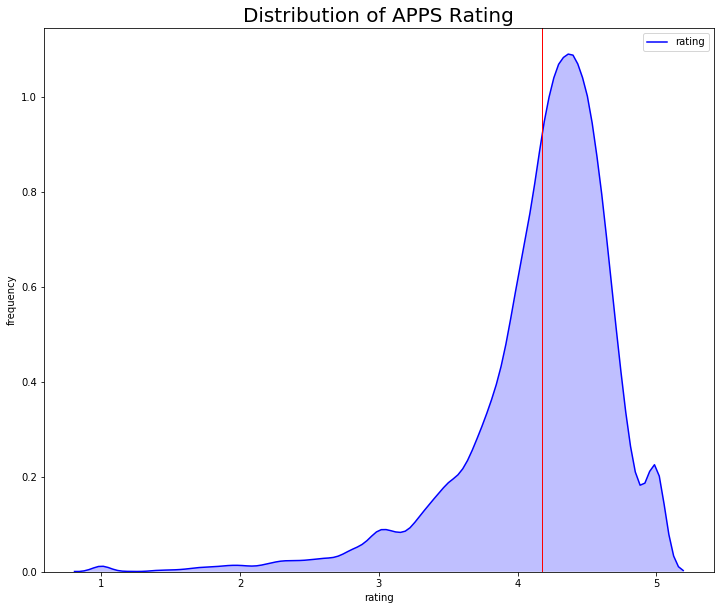

In [27]:
# rating distibution 
rcParams['figure.figsize'] = 12,10
g = sns.kdeplot(df_play_store_clean.rating, color="Blue", shade = True)
g.set_xlabel("rating")
g.set_ylabel("frequency")
plt.title('Distribution of APPS Rating',size = 20)

# drow red line for the mean 
plt.axvline(df_play_store_clean.rating.mean(), color='Red', linestyle='solid', linewidth=1)

In [28]:
df_play_store_clean.rating.mean()

# the mean looks high 

4.173243045387994

**Histogram represent data distribution, it can visulize larg amount of data and show how data behaive. From The distribution you can observe that data is normal distribution but the mean looks high which is 4.1 that means users have ratied high rating numbers of apps.**

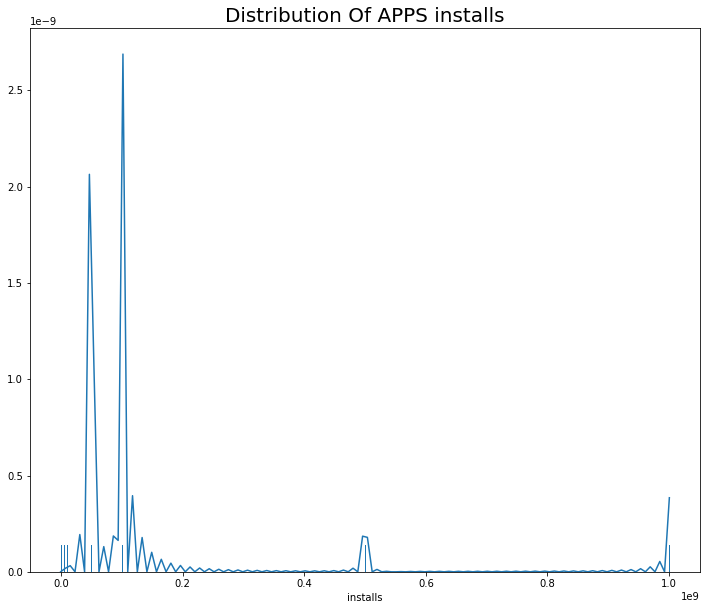

In [29]:
plt.title('Distribution Of APPS installs',size = 20)
sns.distplot(df_play_store_clean.installs, hist=False, rug=True);

In [30]:
df_play_store_clean.installs.describe()

count    9.659000e+03
mean     7.777507e+06
std      5.375828e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: installs, dtype: float64

In [31]:
df_play_store_clean.installs.value_counts().tail()

5             82
1             67
500000000     24
1000000000    20
0             15
Name: installs, dtype: int64

In [32]:
df_play_store_clean[df_play_store_clean.installs == 1000000000].head()

,app,category,rating,reviews,size,rating_category,installs,type,price,content_rating,last_updated,current_ver,android_ver,m_genres,s_genres
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,0.0,three_stars,1000000000,Free,0.0,Teen,2018-08-03,Varies with device,Varies with device,Books & Reference,Books & Reference
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,three_stars,1000000000,Free,0.0,Everyone,2018-08-01,Varies with device,Varies with device,Communication,Communication
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,four_stars,1000000000,Free,0.0,Everyone,2018-08-03,Varies with device,Varies with device,Communication,Communication
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,0.0,four_stars,1000000000,Free,0.0,Everyone,2018-08-01,Varies with device,Varies with device,Communication,Communication
340,Gmail,COMMUNICATION,4.3,4604324,0.0,four_stars,1000000000,Free,0.0,Everyone,2018-08-02,Varies with device,Varies with device,Communication,Communication


**The installation has high number installation then continuous positiviliy but with fewer numbers. From the count you can observe that 20 apps had the highest value of installtion as it shown in the head dataframe.
Those apps are:**
- Google Play
- Messenger – Text and Video Chat for Free
- WhatsApp Messenger
- Google Chrome: Fast & Secure
- Gmail

In [33]:
# prepare value count for plot
genres_counts = df_play_store_clean['m_genres'].value_counts()
genres_order = genres_counts.index

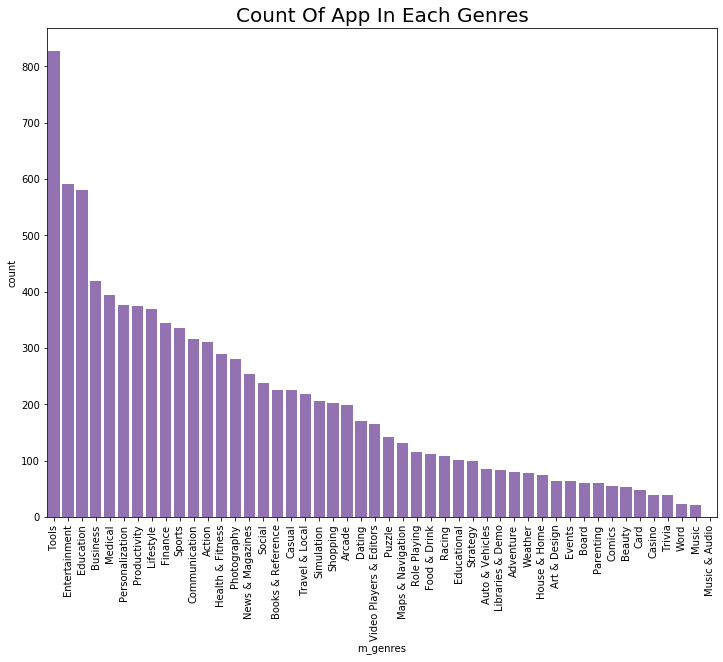

In [34]:
# visulizae main category 
plt.figure(figsize=(12,9))
plt.title('Count Of App In Each Genres',size = 20)
base_color = sns.color_palette()[4]
fig = sns.countplot(x=df_play_store_clean['m_genres'], color=base_color, order= genres_order)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.show(fig)


In [35]:
df_play_store_clean['m_genres'].value_counts().head()

Tools            827
Entertainment    592
Education        580
Business         420
Medical          395
Name: m_genres, dtype: int64

**Count the  main genres of apps, the plot show that tools show the highst count of apps genres, then entertaimnet, education, busness and medical. This column have taken from column genres and splitted to two categories main and sub genres and this plot of main genres.**

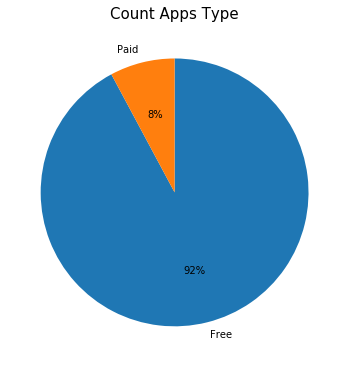

In [36]:
# code for the pie chart seen above
plt.figure(0,figsize = (6,7))
sorted_counts = df_play_store_clean['type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.0f%%');
plt.title('Count Apps Type',color = 'Black',fontsize = 15)
plt.show;

**Count the type of Apps, wether this app is free or paied. By counting the apps its hsow that 92% of apps are free and 8% are paied.**

Text(0.5, 1.0, 'Distribution of APPS reviews')

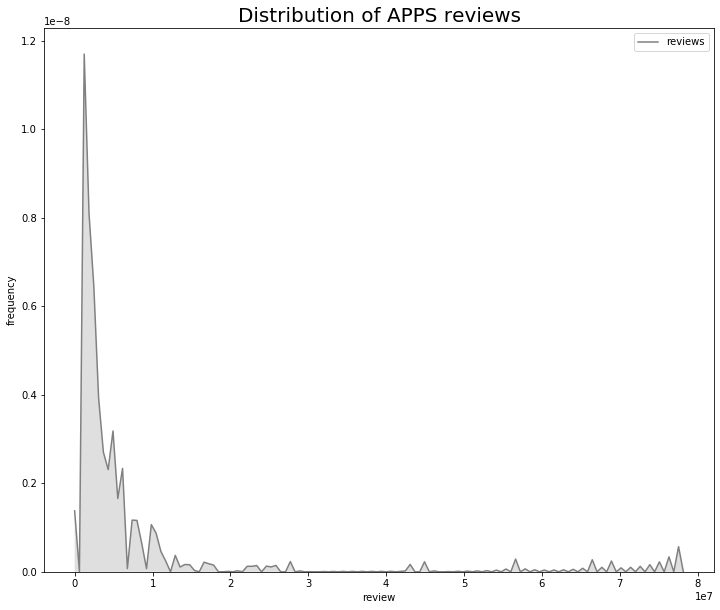

In [37]:
# rating distibution 
rcParams['figure.figsize'] = 12,10
g = sns.kdeplot(df_play_store_clean.reviews, color="Grey", shade = True)
g.set_xlabel("review")
g.set_ylabel("frequency")
plt.title('Distribution of APPS reviews',size = 20)

In [38]:
df_play_store_clean.nlargest(5, ['reviews'])

,app,category,rating,reviews,size,rating_category,installs,type,price,content_rating,last_updated,current_ver,android_ver,m_genres,s_genres
2544,Facebook,SOCIAL,4.1,78158306,0.0,four_stars,1000000000,Free,0.0,Teen,2018-08-03,Varies with device,Varies with device,Social,Social
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,four_stars,1000000000,Free,0.0,Everyone,2018-08-03,Varies with device,Varies with device,Communication,Communication
2545,Instagram,SOCIAL,4.5,66577313,0.0,four_stars,1000000000,Free,0.0,Teen,2018-07-31,Varies with device,Varies with device,Social,Social
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,three_stars,1000000000,Free,0.0,Everyone,2018-08-01,Varies with device,Varies with device,Communication,Communication
1670,Clash of Clans,GAME,4.6,44891723,98000000.0,five_stars,100000000,Free,0.0,Everyone 10+,2018-07-15,10.322.16,4.1 and up,Strategy,Strategy


**Distibution of Data for apps reviews is A right-skewed distribution, which large number of data values occur on the left side with a fewer number of data values on the right side. the reviews of applications has high ratio number decrease or distribute over frequently twoerd positive direction. The high five reviews gone to:**

- Facebook
- WhatsApp Messenger
- Instagram
- Messenger – Text and Video Chat for Free	
- Clash of Clans

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> **For the distibution of Data I have find out some obdervations like in raitng you can observe that users have givien high rating. Apps installation is very high over amount of popular apps and this reflect on review columns. Moreover, ratio of free apps are much higher than paid.**


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

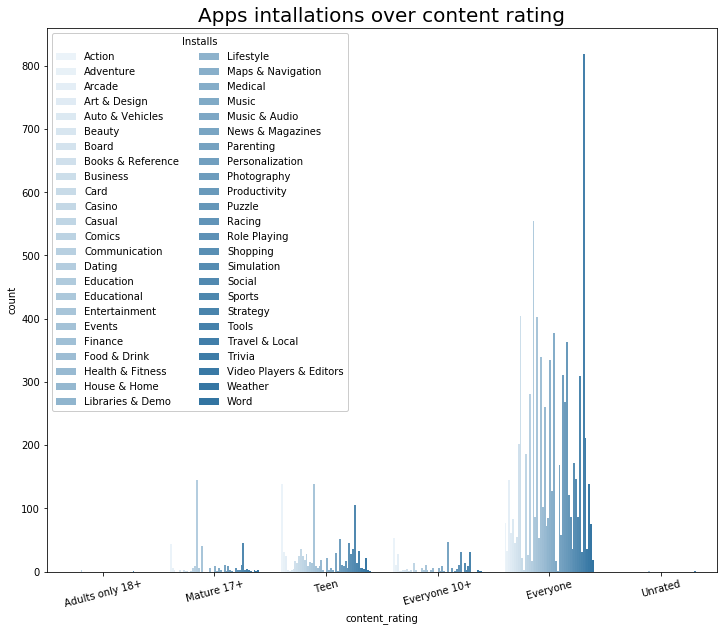

In [39]:
# plot counts apps installation over content rating 
base_color = sns.color_palette()[0]
ax = sns.countplot(data = df_play_store_clean, color= base_color, x = 'content_rating', hue = 'm_genres',
            order=["Adults only 18+", "Mature 17+", "Teen", "Everyone 10+", "Everyone", "Unrated"])
plt.xticks(rotation = 15)
plt.title('Apps intallations over content rating',size = 20)
ax.legend(loc = 2, ncol = 2, framealpha = 1, title = 'Installs')

> **The purpose of this visualization to show the density apps over content rating by counting apps in each genre specified for content rating, which is in content rating Everyone.**

In [40]:
df_play_store_clean[df_play_store_clean.type == 'Free']['m_genres'].value_counts().iplot(kind='bar', colors='Blue'
,title="Top main genres for free apps")

> **The purpose of this visualization to count free apps (which is the majority) over all geres and show the order descending and here is the top five:**

- Tools
- Entertainment
- Education
- Business
- Medical


In [41]:
# top five count genres 
df_play_store_clean.m_genres.value_counts().head()

Tools            827
Entertainment    592
Education        580
Business         420
Medical          395
Name: m_genres, dtype: int64

In [42]:
# save the top five count genres in spreated dataframe 
topcountgenres = df_play_store_clean.query('m_genres == "Tools" or m_genres == "Entertainment" or m_genres == "Education" or m_genres == "Business" or m_genres == "Medical"')

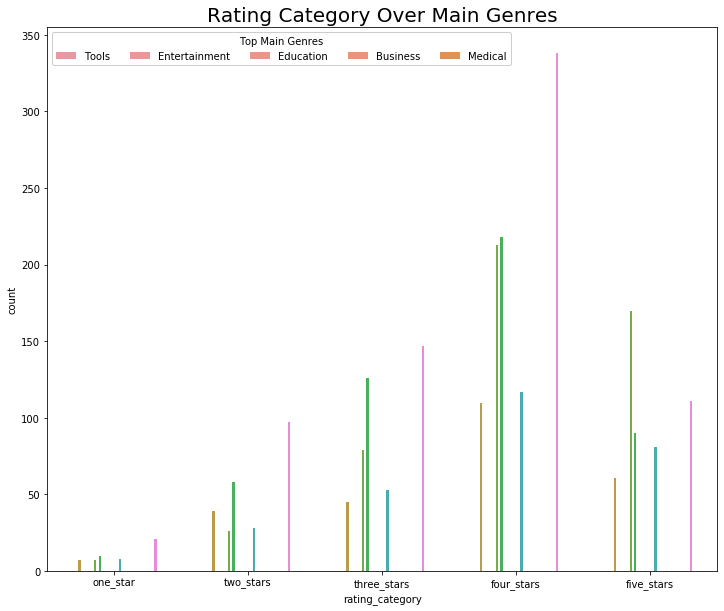

In [43]:
# show the top five count over rating category 
ax = sns.countplot(data = topcountgenres, x = 'rating_category', hue= 'm_genres')
plt.xticks(rotation = 0)
plt.title('Rating Category Over Main Genres',size = 20)
ax.legend(['Tools', 'Entertainment','Education','Business','Medical'],loc = 2, ncol = 60, framealpha = 10, title = 'Top Main Genres')

> **The purpose of this visualization to see the top five applications over rating category, this plot show higher distibution over four stars, which that remind us of how rating was very high mean (4.1).**

In [44]:
df_play_store_clean.rating_category.value_counts()

four_stars     4071
five_stars     1702
three_stars    1549
two_stars       727
one_star        124
Name: rating_category, dtype: int64

In [45]:
px.scatter(df_play_store_clean,x="rating_category",y="reviews", orientation="h", title="Category Rating rlationship with Reviews distributeed on it")

> **The purpose of this visualization is to see user behavier on reviews, the four stars category has the highest reviews and most of review are bellow 10 millions**

In [54]:
fourstars_rating = df_play_store_clean.query('rating_category== "four_stars"')
dat = fourstars_rating.sort_values('reviews', ascending=False).head()
px.bar(dat, x="app", y="reviews", orientation="v", title="Highest Apps Reviews in four stars")

In [47]:
fourstars_rating.groupby('reviews')['app'].value_counts().tail()

reviews   app               
25655305  YouTube               1
27722264  Subway Surfers        1
66577313  Instagram             1
69119316  WhatsApp Messenger    1
78158306  Facebook              1
Name: app, dtype: int64

> **The top five apps in four stars rating category**
- Facebook
- WhatsApp Messenger
- Instagram
- Subway Surfers
- YouTube

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The Rating that we obserbed in part Univariate, has has very good relationships with other columns. I have notice that free apps are the majority so I can measure on them. Apps have rating category which is devided in five categoies (stars), I can observe the four stars rating is the most, which is reflect 4.1 rating that I found in last part.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  The four stars also has realtionship with with reviews whcih reviews is much higher on the category four stars, rather than other categories.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(0.5, 1, 'correlation of rating, reviews, size, installs, price')

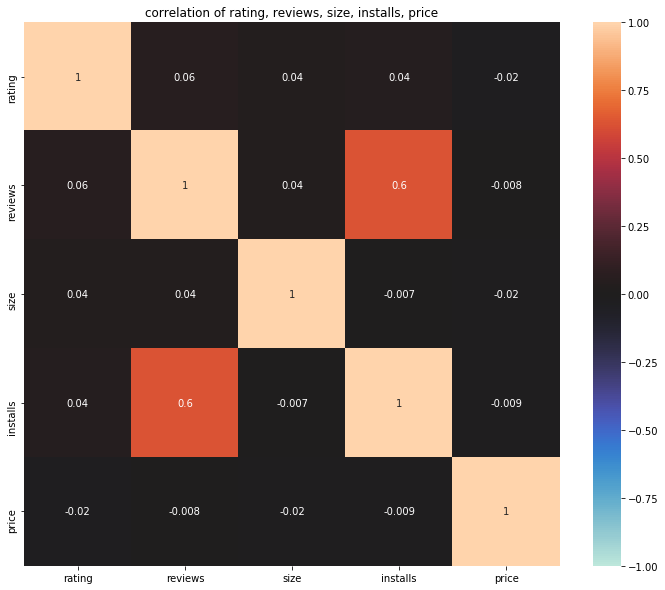

In [49]:
aex = plt.axes()
sns.heatmap(df_play_store_clean.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0)
aex.set_title('correlation of rating, reviews, size, installs, price')

> **The purpose of this visualization is to measure corrolation between columns, as you can see there's high correlation between reviews and installs. This correlation means that prove positive relation.**

In [50]:
scattermatrixcorr = px.scatter_matrix(df_play_store_clean, dimensions=["rating_category","price","reviews","installs"])
scattermatrixcorr.update_layout(title="Google Play distribtion by category rating, Price, Reviews, Installs",title_x=0.5)
scattermatrixcorr.show()

> **The purpose of this visualization is to measure the behaviour of each columns with the other, from the plot you can see that reviews increase with four stars rating category and install also. From the plot you can observe that most off applications installed are free.** 

In [51]:
df_play_store_clean.iplot(kind='bubble', x="rating_category",y="installs",categories="type", size='reviews', xTitle='Rating Stars', yTitle='installs', title="Scatter show the relationship between installs and reviews in free Apps")

C:\Users\Fahad\anaconda3\envs\plusaltra\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\Fahad\anaconda3\envs\plusaltra\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



> **The purpose of this visualization is to clarify the relationship between the installl and reviews over the reating categoty and type, as you can see we observed that install and reviews have positive relation in four and three stars rating category.** 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> **from the heartmap we observed relation between reviews and and installs columns, to findout the type of the relations we have shown the plot scatter matrix to get more observations like this happen in free apps that are between three and four stars.**
